# Aspirin Hydrolysis Curve Fits

the data is from 
"Addition of water to 1-alkynylamines. Kinetics and mechanism", W.F. Verhelst, W. Drenth, *J. Am. Chem. Soc.*, **1974**, *96*, 6692-6697. https://doi.org/10.1021/ja00828a025

## Buffer Catalysis

Figure 1 in the paper has a plot that describes buffer catalysis. Let us plot the data for ourselves and see if we get the same answer.

### Step 1: Load Data

The data table from the above paper was made into a csv file (`Fig1Data.csv`). Below the data is imported and the linear curve fit applied.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

################################################################################
### Set global variables. Set flag accordingly
################################################################################

#github = True  
github = False  

if github:
    data_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_10/data/"
    image_path = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_10/images/"
    github_data_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
    github_styles_location = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
else:
    data_path = "data/"
    image_path = "images/"
    github_data_location = "/Users/blink/github/LFER-QSAR/data/"
    github_styles_location = "../../styles/"


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv(data_path+"Fig1Data.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="HCO3-", 
                 comment = "#") 

#df.sort_values(by="HCO3-", inplace=True)

df["HCO3-"] = df["HCO3-"]/100  # the data in the plot is multiplied by 100

df

,HCO3-,k_obs
0,0.001109,4.751
1,0.003957,5.962
2,0.003964,7.907
3,0.007518,11.348
4,0.011075,15.837
5,0.011266,13.892
6,0.014724,17.932
7,0.018572,20.925
8,0.018578,22.721
9,0.018665,19.129


int 5.0883855373836795
slope 847.3477439182903


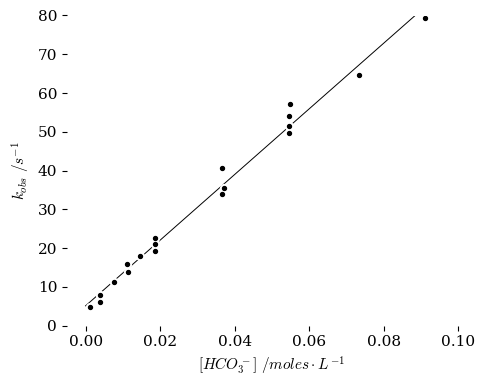

In [3]:
x = df["HCO3-"]
y = df["k_obs"]

#x = df["log_conc"]
#y = df["logk"]


line = True


def linefit(x, int, slope):
    y = int + x*slope
    return y

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(github_styles_location+"tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  


param, pcov = curve_fit(linefit, x, y)
step = .1
fitx = np.arange(0, np.max(x)+step, step)
fity = linefit(fitx, param[0], param[1])


if line == True:
    ax.plot(fitx, fity, color='black', zorder=1, linewidth=0.7)
print("int",param[0])
print("slope",param[1])
#print(fity, x)

########################
### Plot the data    ###
########################

ax.scatter(x,y, s=32, color="white", zorder=3)
ax.scatter(x,y, s=8, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$k_{obs}~/s^{-1}$", 
       xlabel=r"$[HCO^-_3]~/moles \cdot L^{-1}$",
#          xlim=[0,13],                  
          ylim=[0,80]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plot_fig1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


# Bronsted Plot

Below is code for the bronsted plot.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv(data_path+"Table1Data.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="HCO3-", 
                 comment = "#") 

#df.sort_values(by="HCO3-", inplace=True)

df["log_kBH"] = np.log10(df["k(BH)"])  # the data in the plot is multiplied by 100

df

,Buffer,pKa,k(BH),HxA protons (p),A basic sites (q),log_kBH
0,H3PO4-,7.2,80000.00,2,3,4.903090
1,HCO3-,10.2,830.00,1,3,2.919078
2,H3BO3(H2O),9.2,194.00,2,4,2.287802
3,HPO4(2-),12.4,23.00,1,4,1.361728
4,H2O,15.7,0.02,2,1,-1.698970


int 9.853039517702548
slope 0.7219829980585428


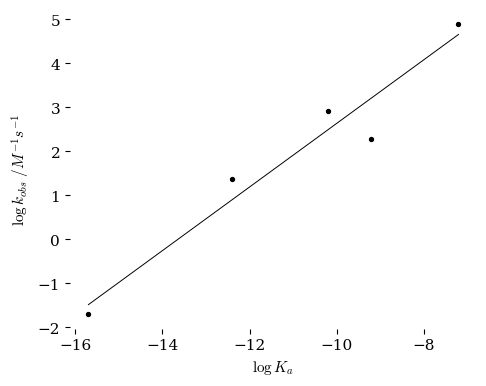

In [8]:

x = -df["pKa"]
y = df["log_kBH"]

line = True


def linefit(x, int, slope):
    y = int + x*slope
    return y

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(github_styles_location+"tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  


param, pcov = curve_fit(linefit, x, y)
step = .1
fitx = np.arange(np.min(x), np.max(x)+step, step)
fity = linefit(fitx, param[0], param[1])


if line == True:
    ax.plot(fitx, fity, color='black', zorder=1, linewidth=0.7)
print("int",param[0])
print("slope",param[1])
#print(fity, x)

########################
### Plot the data    ###
########################

ax.scatter(x,y, s=32, color="white", zorder=3)
ax.scatter(x,y, s=8, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}~/M^{-1}s^{-1}}$", 
       xlabel=r"$\log{K_a}$",
#          xlim=[0,13],                  
#          ylim=[0,80]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plot_fig2.pdf")   # use this to save the figure in PDF format
plt.show()                     # output the combined plot plots



# Taft Plot

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.optimize import curve_fit


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################
df = pd.read_csv(data_path+"Table3Data.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="HCO3-", 
                 comment = "#") 

#df.sort_values(by="HCO3-", inplace=True)

df["log_k"] = np.log10(df["k_obs"] ) 

df

,sum_s,k_obs,log_k
0,0.67,0.015,-1.823909
1,0.00,0.750,-0.124939
2,-0.14,1.030,0.012837
3,-0.20,2.500,0.397940
4,-0.22,2.190,0.340444
5,-0.23,1.470,0.167317
6,-0.38,1.880,0.274158


int -0.26459844387535625
slope -2.1920763287114386


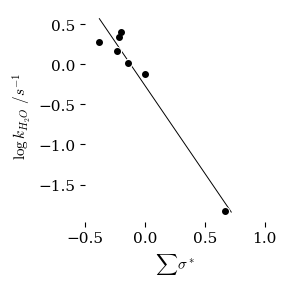

In [10]:

x = df["sum_s"]
y = df["log_k"]

line = True


def linefit(x, int, slope):
    y = int + x*slope
    return y

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

plt.style.use(github_styles_location+"tufte.mplstyle")        
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  


param, pcov = curve_fit(linefit, x, y)
step = .1
fitx = np.arange(np.min(x), np.max(x)+step, step)
fity = linefit(fitx, param[0], param[1])


if line == True:
    ax.plot(fitx, fity, color='black', zorder=1, linewidth=0.7)
print("int",param[0])
print("slope",param[1])
#print(fity, x)

########################
### Plot the data    ###
########################
ax.scatter(x,y, s=32, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

    
############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{H_2O}~/s^{-1}}$", 
       xlabel=r"$\sum{}{} \sigma^*$",
          xlim=[-0.5,1],                  
#          ylim=[0,80]
      
      )

#ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

#############################
### Output the final plot ###
#############################

fig.savefig("plot_fig3a.pdf")   # use this to save the figure in PDF format
plt.show()                     # output the combined plot plots

